[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/worldbank/dec-python-course/blob/project2/1-foundations/project-2-rasters_and_functions/Project%202.ipynb)

## Project 2 - Raster Analysis and Data Analysis

### P2.1 Raster Analysis

In the past few years, aerial imagery or satellite data have been getting increasingly mainstreamed in many global research projects. The many advantages of this kind of data has helped development agencies and many other sectors get consistent, global temporal data. Remote sensing experts have invested considerable amount on time in developing algorithms that remove biases from the data, mask out cloud covers and create different indicies that can be used to visualize different types of attributes in an image. 

While a typical raster analysis, with more in-depth details, will be covered in future sessions on Geospatial data, we thought we'd give you the taste of how convinient it is to work with raster data, by just using the basic skills you learnt in these foundation sessions. 

In this project we'll read in raster data with the help of a very popular geospatial library called GDAL and use the data to create some indices and visualize them. 

So lets start with understanding what raster data really is. Raster or “gridded” data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface. A raster file is composed of regular grid of cells, all of which are the same size.

You’ve looked at and used rasters before if you’ve looked at photographs or imagery in a tool like Google Earth. However, the raster files that you will work with are different from photographs in that they are spatially referenced. Each pixel represents an area of land on the ground. That area is defined by the *spatial resolution* of the raster.

<figure>
    <img src="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" height="800" width="600">
</figure>
A raster is composed of a regular grid of cells. Each cell is the same size in the x and y direction. 

[Source: Colin Williams, NEON.](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/)

If you'll notice the structure of data in the image above, you'll see it's something like an array. Most of our raster analysis is done by using matrix operations i.e. using array functionalities in Python. 

So recall your basics from Numpy sessions as we're going to use some of them hre. 

In [60]:
## Importing required libraries
## If you get ModuleNotFoundError, contact one of the TAs to help setup libraries

import pandas as pd
import numpy as np
import requests
try:
    from osgeo import gdal
except:
    import gdal
from osgeo import gdal_array
import shapely
import pylab as pl
import warnings
import seaborn as sns

import urllib.request
import sys, os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

warnings.filterwarnings("ignore")
%matplotlib  inline

In [61]:
## Reading the data from a TIFF file. Raster files usually have extensions like TIFF, TIF, GTIFF etc. 
## You can also access PNG, JPEG but they aren't spatially referenced (since they're just images)



url = "https://github.com/worldbank/dec-python-course/blob/project2/1-foundations/project-2-rasters_and_functions/NYC_test.tif?raw=true"
urllib.request.urlretrieve(url, 'NYC_test.tif')
os.listdir()

#dataset = gdal.Open(r"NYC_test.tif")

['.ipynb_checkpoints',
 'data-pvLFI.csv',
 'FirearmsOwnership_data.xlsx',
 'img',
 'NYC_test.tif',
 'NYC_training_data.tif',
 'Project 2.ipynb',
 'Project 2_Solutions.ipynb']

Since this is a sample dataset, its not a big file. Just something that covers Manhattan area of New York.

We can check is the size of the raster and how many bands does it have.

In [3]:
print("This raster has {} bands!".format(dataset.RasterCount))
  
# width 
print("Width of the raster is {} pixels".format(dataset.RasterXSize))
  
# height
print("Height of the raster is {} pixels".format(dataset.RasterYSize))

This raster has 12 bands!
Width of the raster is 623 pixels
Height of the raster is 519 pixels


Without going into too much detail, since the data is acquired from [Landsat 8](https://www.usgs.gov/landsat-missions/landsat-8) (a multispectral satellite), we get multiple bands of data, each representing different optical, thermal and infrared information of the planet. Each band has different resolution and wavelngth that's captured by the scanner. In raster analysis, each band is represented by a "layer" of numpy array, i.e. in case of a 3-D array, the raster would have as many z-axis as it has bands. In our case, this Landsat data has 12 z-axis elements. 

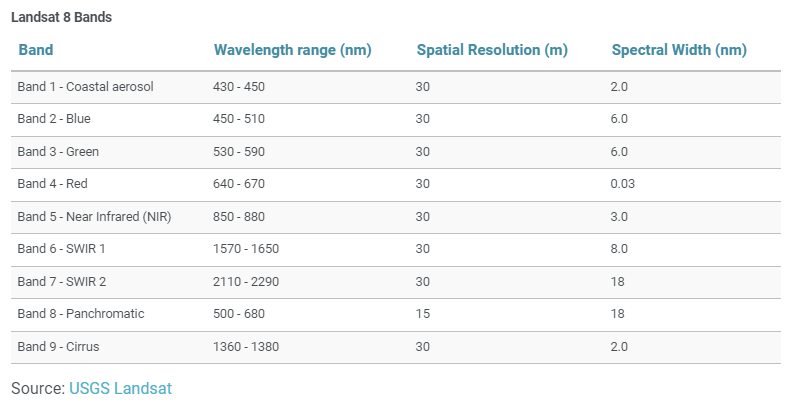

In [4]:
#from IPython.display import Image
#Image("./img/landsat8_bands.png")

In the next line, try inspecting what is stored in the variable `dataset`.

In [5]:
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000016FFCC07630> >

That doesn't look like an array to me. That's because, since the raster data is inherently bulky, the Open function of GDAL just reads the headers where the metadata is stored. 

To get the actual values, we need to use the function `ReadAsArray`. Now try executing the following statement. 

In [6]:
dataset.GetRasterBand(1).ReadAsArray()

array([[0.0659 , 0.0659 , 0.0514 , ..., 0.0383 , 0.0385 , 0.0347 ],
       [0.0397 , 0.0397 , 0.0391 , ..., 0.0358 , 0.0364 , 0.0342 ],
       [0.04045, 0.04045, 0.0417 , ..., 0.0339 , 0.03455, 0.0345 ],
       ...,
       [0.0349 , 0.0342 , 0.0344 , ..., 0.08425, 0.09445, 0.09445],
       [0.0356 , 0.0341 , 0.035  , ..., 0.0883 , 0.0833 , 0.0833 ],
       [0.0336 , 0.0345 , 0.0337 , ..., 0.08875, 0.0762 , 0.0762 ]],
      dtype=float32)

#### Task 1

Let's start putting our Numpy knowledge to some use. In the following piece of code, I have created an empty array with all 0 values. Your job is to copy the values from `dataset` raster and fill this `image` raster below. 

In [7]:
# Initialize a 3d array -- size based on raster dimensions
image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount))

# Allocate array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))


### YOUR CODE HERE

## HINT : We already know there are different bands in the data. 
# That is represented by dataset.RasterCount in the previous statement. 
# To fill this empty raster, you need to loop through the bands, 
# use the function we used before to get array data from RasterBand and store it in image variable. 
# You would also notice that this dataset is 3-D, so it requires 3-D indexing
# To select 1st element on z-axis, you filter the array as `z1 = arr[:,:,0]`
# i.e. give me all x and y values from array `arr` but only 0th z-axis

for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)

    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()



    
    
## ========DO NOT EDIT THIS PART===========

assert np.nanmax(image[::1]) == np.float32(1.2825), "Something is not write. The data seems different than what it should be"

Great Job with creating this new array. While we're at this, let's try and display what each band looks like. 

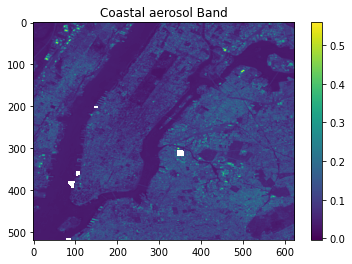

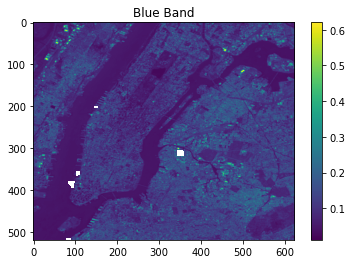

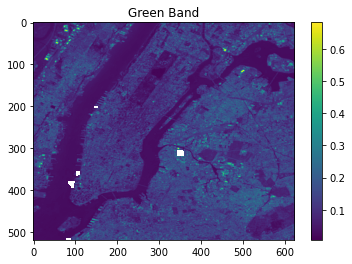

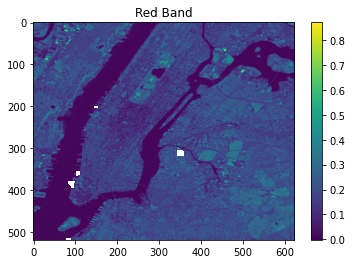

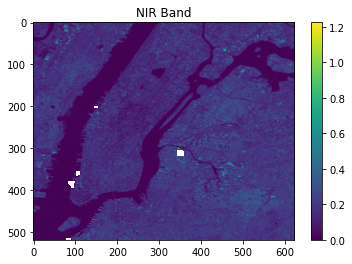

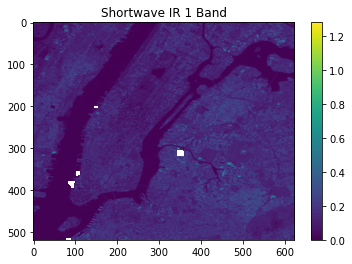

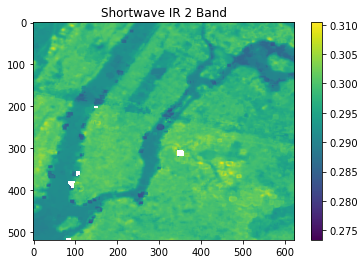

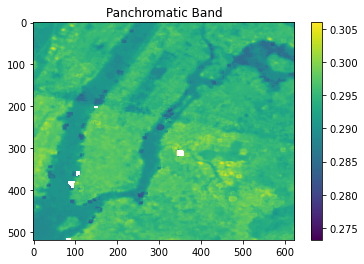

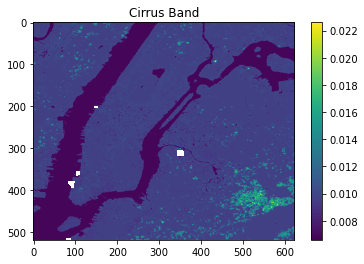

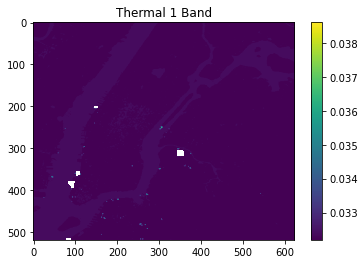

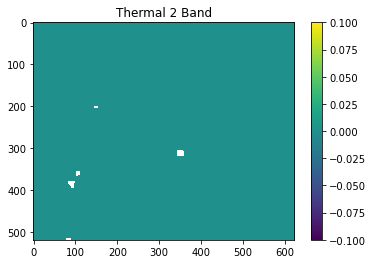

In [9]:
band_dict = {1:'Coastal aerosol',2:'Blue',3:'Green',4:'Red',5:'NIR',6:'Shortwave IR 1',
7:'Shortwave IR 2',8:'Panchromatic', 9:'Cirrus', 10:'Thermal 1',11:'Thermal 2'}

for i in range(1, 12):

    pl.figure()
    pl.title(band_dict[i]+" Band")
    pl.imshow(image[:,:,i])
    pl.colorbar()
    pl.show()

#### Task 2

We now have access to multiple bands. Let's create some of the indicies we talked about. Let's create a raster of NDVI (Normalized Difference Vegetation Index)

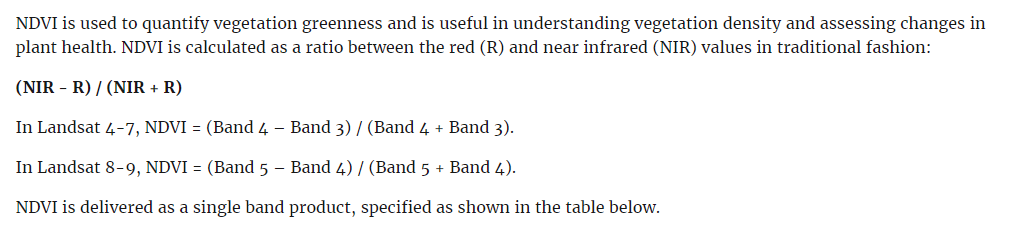

You now know what bands to use to create this index. So go ahead and try it out in the next block

In [10]:
### YOUR CODE HERE

## HINT : Subset the 3D array to get all the data from X and Y axis, and band number for Z-axis
## Use the logic : ndvi = (band5 - band4) / (band5 + band4) 

b_red = 3 # Band 4 (numpy index starts from 0)
b_nir = 4 # Band 5 (numpy index starts from 0)

ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / (image[:, :, b_red] + image[:, :, b_nir])

## ====== DO NOT EDIT THIS PART=========

assert np.nanmean(ndvi) == np.float32(0.098619044), "Something went wrong! Maybe re-check 3D indexing?"

You've created one of the most commonly used index in remote sensing to assess the "green areas" or vegetaion density in any part of the world. Since it's New York City, we mostly know what to expect but let's visualize that.

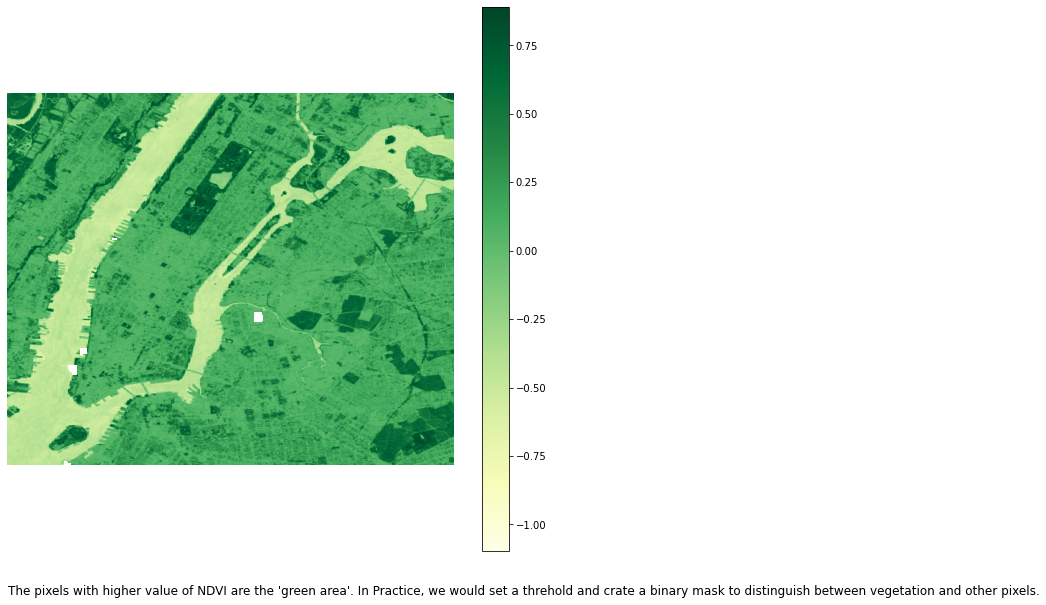

In [11]:
pl.figure(figsize=(10,10))
pl.imshow(ndvi, cmap='YlGn')
pl.colorbar()
pl.axis('off');
pl.text(0, 700, "The pixels with higher value of NDVI are the 'green area'. \
In Practice, we would set a threhold and crate a binary mask to distinguish between vegetation and other pixels.", fontsize=12);

#### Task 3

Now that you've tried your hand at NDVI, let's also create two other commonly used indicies, NDBI and NDWI

NDBI - The Normalized Difference Built-up Index (NDBI) uses the NIR and SWIR bands to emphasize manufactured built-up areas. It is ratio based to mitigate the effects of terrain illumination differences as well as atmospheric effects.

Logic <==> (SWIR - NIR) / (SWIR + NIR) OR (Band 6 – Band 5) / (Band 6 + Band 5)

<br>
NDWI - Normalize Difference Water Index (NDWI) is use for the water bodies analysis. The index uses Green and Near infra-red bands of remote sensing images. The NDWI can enhance water information efficiently in most cases. It is sensitive to build-up land and result in over-estimated water bodies. The NDWI products can be used in conjunction with NDVI change products to assess context of apparent change areas.
<br>
<br>
Logic <==> (Band 3 – Band 6) / (Band 3 + Band 6)

[Definition Source](https://www.linkedin.com/pulse/ndvi-ndbi-ndwi-calculation-using-landsat-7-8-tek-bahadur-kshetri/)

In [12]:
### YOUR CODE HERE

## Create NDBI index here
## Use the logic : ndvi = (band6 - band5) / (band6 + band5) 

b_nir = 4 # Band 5 (numpy index starts from 0)
b_swir = 5 # Band 6 (numpy index starts from 0)

ndbi = (image[:, :, b_swir] - image[:, :, b_nir]) / (image[:, :, b_swir] + image[:, :, b_nir])

## ====== DO NOT EDIT THIS PART=========

assert np.nanmean(ndbi) == np.float32(-0.07484315), "Something went wrong! Maybe re-check 3D indexing?"

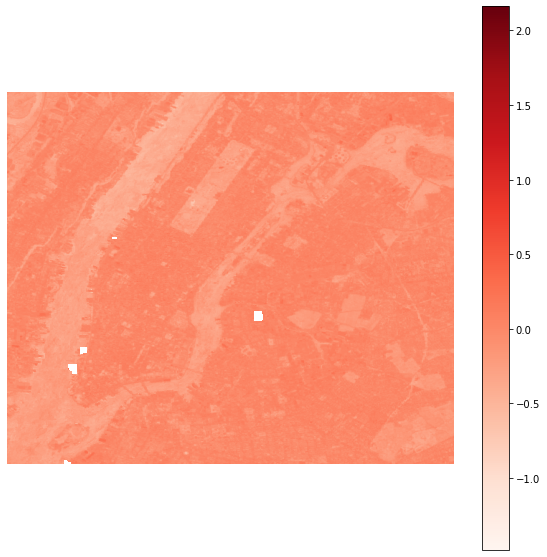

In [13]:
pl.figure(figsize=(10,10))
pl.imshow(ndbi, cmap='Reds')
pl.colorbar()
pl.axis('off');

In [14]:
### YOUR CODE HERE

## Create NDWI index here
## Use the logic : ndvi = (band3 - band6) / (band3 + band6) 

b_green = 2 # Band 3 (numpy index starts from 0)
b_swir = 5 # Band 6 (numpy index starts from 0)

ndwi = (image[:, :, b_green] - image[:, :, b_swir]) / (image[:, :, b_green] + image[:, :, b_swir])



## ====== DO NOT EDIT THIS PART=========

assert np.nanmean(ndwi) == np.float32(-0.04588928), "Something went wrong! Maybe re-check 3D indexing?"

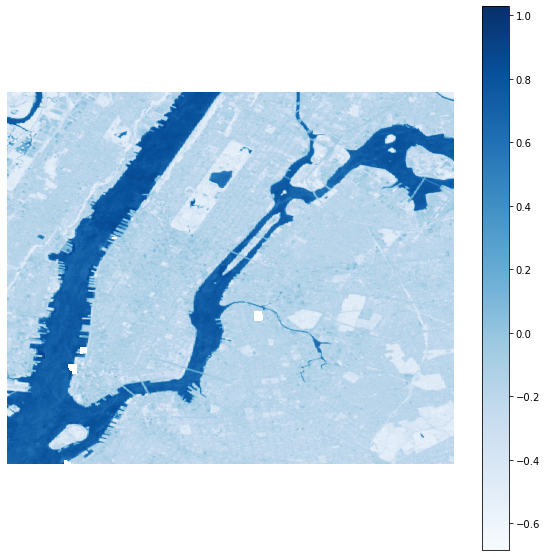

In [15]:
pl.figure(figsize=(10,10))
pl.imshow(ndwi, cmap='Blues')
pl.colorbar()
pl.axis('off');

The further we dive into rasters, the more technical knowledge we would need. So for now, we'll wrap up the raster analysis here (which was majorly dependent on arrays). We'll continue with these in Geospatial section in the Advanced Topics. 

## P2.2 Wine Quality Prediction

Since we're this close to a long weekend, let's put our data analysis skills to use and predict based on wine properties, if the wine if good or bad. We'll make use of Logistic Regression, a method that estimates the probability of an event occurring based on a given dataset of independent variables. In the given dataset, we have a feature called `quality` that will help us determine is the wine is good or bad. That essentially will be our *target variable*

First things first, let's bring in the data that we'll be using for this exercise. The dataset is hosted on UC Irvine's server, and we'll read it directly from the server. On day 3 we did something similar where we read the raw csv data from Github. In the next task. you'll read in the data to create a pandas dataframe, display the data and show some summary stats. 

#### Task 1

In [54]:
## Read the data from the following URL and show top 5 and bottom 4 rows of this dataset
## https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
## Be sure to check what separates the data in this CSV file
## After reading the data in, show top 5 rows of the dataset

### YOUR CODE HERE

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
## Show bottom 4 rows of the dataset

### YOUR CODE HERE

df.tail(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [19]:
## Now let's see what kind of data does this dataset have. 
## Display the shape of the dataset (just to get the sense of how big the dataset is)


### YOUR CODE HERE

df.shape

(1599, 12)

In [20]:
## Now I'd like to check the column names, their data types and whether or not we have null values

## HINT: There's a pandas function that summarizes that for you


### YOUR CODE HERE

df.info() ## or df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


While its great to see some of the basic stats, I think pictorial representation of data would help me better understand the data and the underlying trends it may have. In Task 2 you'll create a function to plot 4 diagnostic plots : Histogram, Scatter Plot, Box Plot and Bar Plot

#### Task 2

In [22]:
## On Day 4 you must have played around with Matplotlib and Seaborn libraries. 
# Use `histplot`, `boxplot` and `barplot` functions from seaborn library
# and `scatter` function from matplotlib
# You do not have to plot `quality` since its the target variable
# Choose any color to plot the charts. Be sure to add titles to each of the subplot

## HINT : You'll have to create subplots so that all 4 plots can be displayed in one row.
## For scatter and bar plot you need two variables. One variable would be the one you'll inspecting 
# and the other would be the target variable `quality`

def diagnostic_plots(df, variable, target):
    """
    Function to create diagnostic plots

    Inputs:
    df : Dataframe that contains data for analysis
    varibale : varibale under inspection
    target : target variable for 2-D plots

    Returns:
    None
    """

    # Define figure size.
    pl.figure(figsize=(20, 4))
    

    # histogram
    pl.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    pl.title('Histogram')


    # scatterplot
    pl.subplot(1, 4, 2)
    pl.scatter(df[variable],df[target],color = 'g')
    pl.title('Scatterplot')
    
    
    # boxplot
    pl.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    pl.title('Boxplot')
    
    # barplot
    pl.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    pl.title('Barplot')
    
    
    pl.show()

fixed acidity


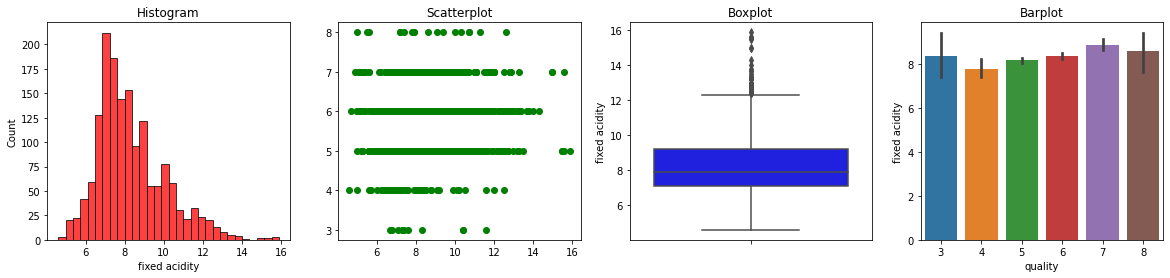

volatile acidity


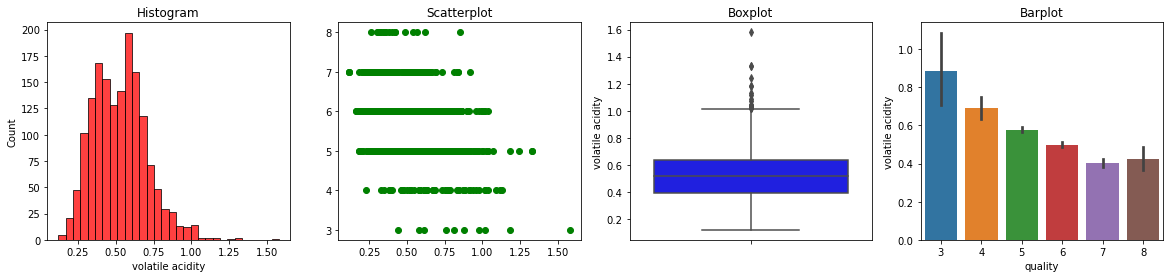

citric acid


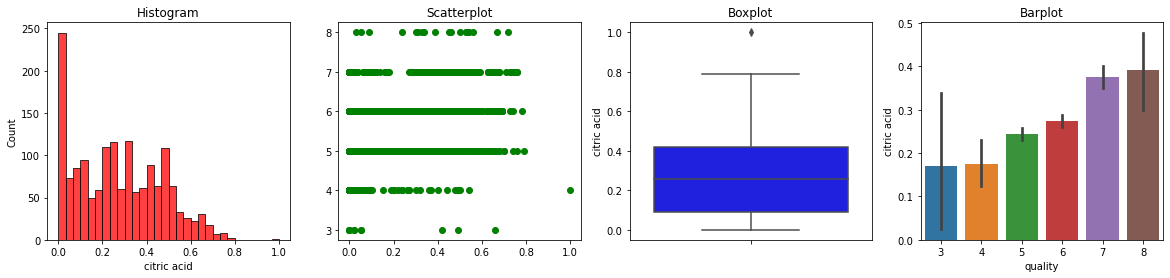

residual sugar


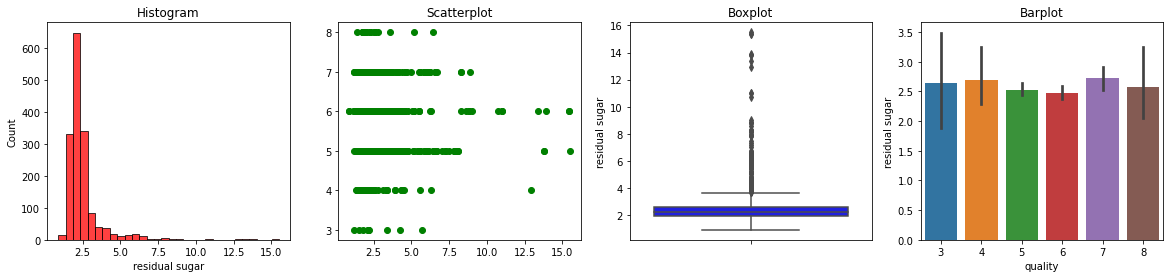

chlorides


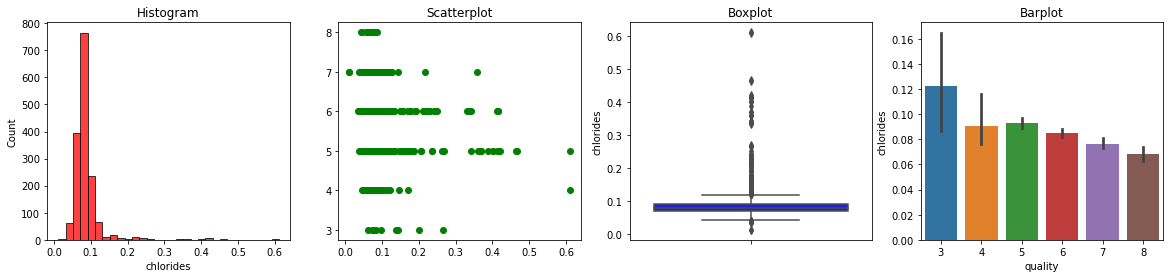

free sulfur dioxide


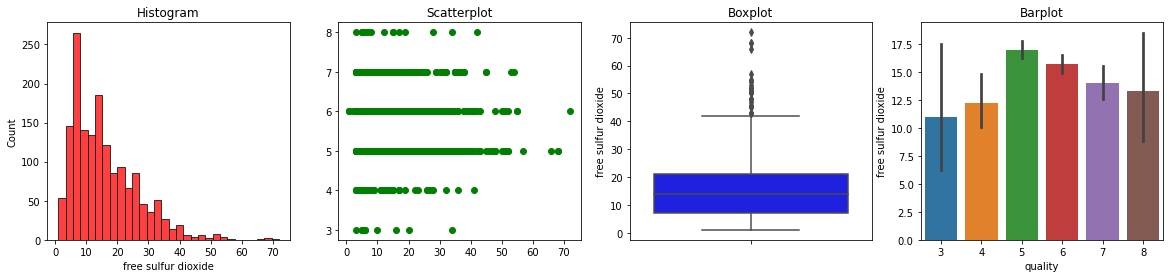

total sulfur dioxide


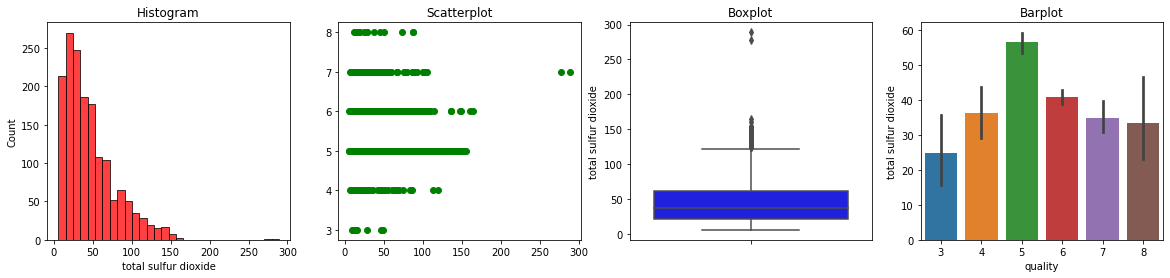

density


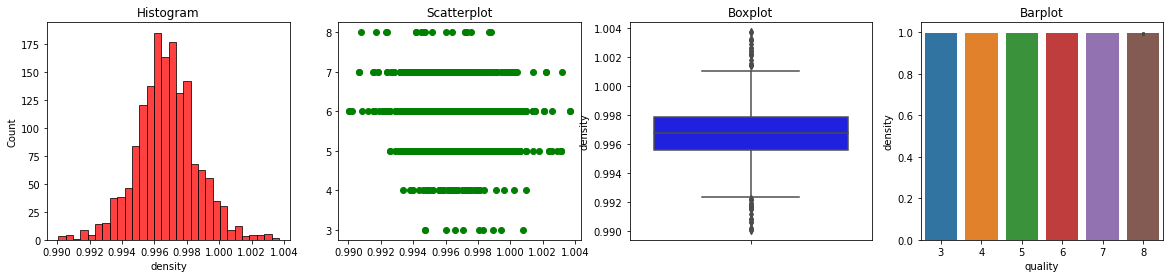

pH


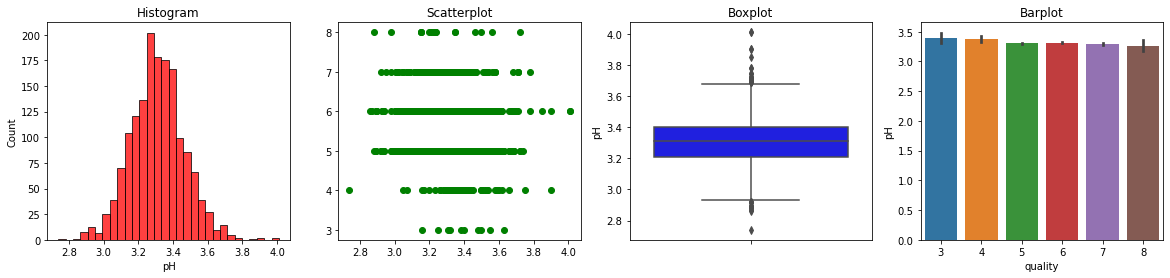

sulphates


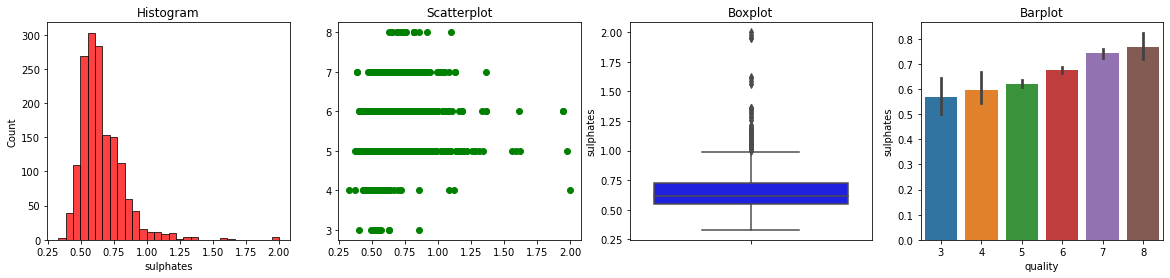

alcohol


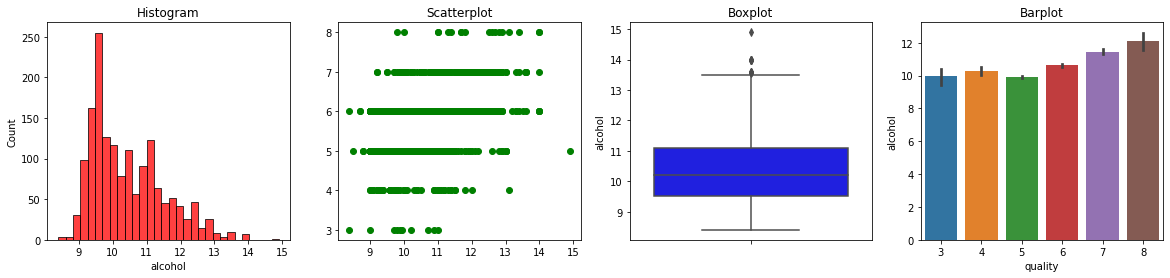

In [23]:
## Use the function to dipslay charts here

for variable in df.columns[:-1]:
    print(variable)
    diagnostic_plots(df,variable,'quality')

This does help a little to understand how variables are distributed. Now let's see how these variables are correlated with each other. Use the hints below to create a heatmap matrix of correlation between the variables.

#### Task 3

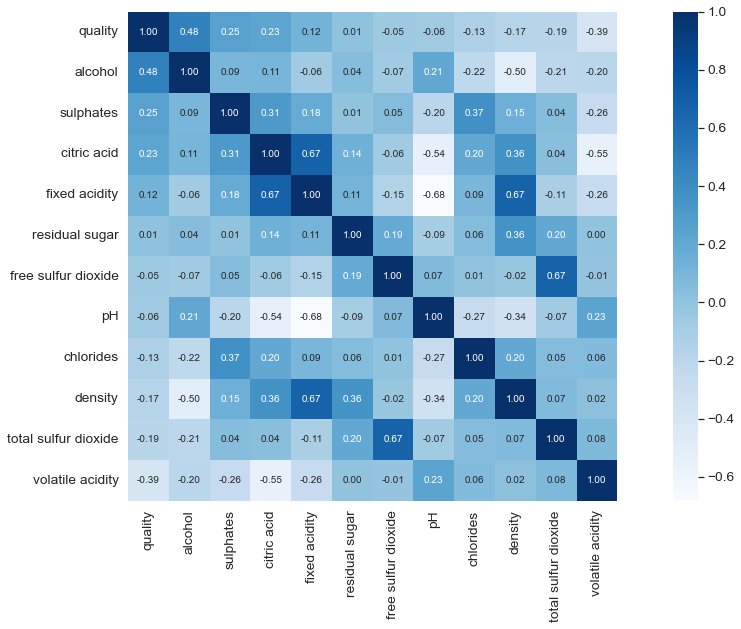

In [25]:
## Pandas provides a function that converts dataframe into a a dataframe of correlation values
## Use `.corr()` function on the dataframe and assign it to a variable `corr`
## initialize a variable `k` with the number of features in the dataset
## Get the list of features in increasing order of their correlation with `quality`; our target variable. Name this list `cols`
## Colormap of the matrix will depend on the correlation coefficient values on the corr dataframe. Assign it to variable `cm`
## Step to generate cmap is provided below

## Now create a heatmap using function from seaborn package
## Use the following inputs to the function:
# data = cm, cbar=True, snnot=True, square=True, fmt='.2f', annot_kws={'size' : 10},
# yticklabels = cols.values, xticklabels = cols.values, cmap='Blues'

corr = df.corr()
pl.figure(figsize=(20, 9))
k = len(df.columns) #number of variables for heatmap
cols = corr.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
pl.show()

Dark shades represents positive correlation while lighter shades represents negative correlation.

Observations:

- Here we can infer that `density` has strong positive correlation with `fixed acidity` whereas it has strong negative correlation with `alcohol`.

- `free sulphur dioxide` and `pH`, `residual sugar` has almost no correlation with `quality`.

- Since correlation is zero we can infer there is no linear relationship between these two predictors.

- Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.


This would also be a great opportunity to identify if some variables are highly correlated (a good check for [multicollinearity](https://ehikioya.com/forums/topic/autocorrelation-heteroscedasticity-and-multicollinearity/)). In this case, we're fine. No variables are highly correlated. 

<br><br>

Next, we check if our dataset has any outliers. We'll ask you to create a function that would return a datafarme of indices of all the columns that are outliers for some or the other feature. 

#### Task 4

In [55]:
## We'll use Gaussian limits to identify outliers (at 99th percentile)
## i.e. for each feature identify what rows are above or below mean +- 3 times the standard deviation of that feature

## HINT: create two variables `thresh_high` and `thresh_low`.
## Set `mean` +- 3 * Stanadrd deviation to each of the variable
## Use dataframe `OR` operation to check what rows are above and below these threshold
## Store the indices of such rows in a list
## The function must return the list of the indices of outlier rows


def detect_outliers(df, features):
    """
    Function to indentify outliers in the dataset (using Gaussian limits)

    Inputs:
    df : Dataframe under consideration
    features : list of features 
    """

    ### YOUR CODE HERE

    indices = []
    for x in features:
        thresh_high = df[x].mean() + 3*df[x].std()
        thresh_low = df[x].mean() - 3*df[x].std()

        df_ = df[(df[x] < thresh_low) | (df[x] > thresh_high)]

        indices.extend(list(df_.index))

    #df_ = df[df.index.isin(indices)]

    return indices

In [56]:
## call the function you created above and filter the dataset by removing the rows with these indices
## You do not need to identify outliers for target variable `quality`

### YOUR CODE HERE

outliers = detect_outliers(df, df.columns[:-1])
df = df[~df.index.isin(outliers)]


##======= DO NOT EDIT THIS PART============
assert df.shape[0] == 1458

Great! Now our dataset is almost ready to model. But first, we need to encode our target variable since we need a binary output, is our wine good or bad?

In [57]:
## Here we're assigning the labels good and bad in order to generate a binary output. 
## You can choose any binning scheme, I used this to fairly `normally` distribute the data.

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

At this point, I'd like to introduce another library to you, [sklearn](https://scikit-learn.org/stable/). This is one of the most powerful library Python has to offer when it comes to data science related tasks. It makes modeling data with classic machine learning algorithm so much easier. We'll go in depth of this library function in our advanced module, but for now we'll use the Logistic Regression related functions for toady's project.

In the next part, we'll encode the `quality` variable. Since we need numeric data to pass in the model, we need to `tokenize` or `factorize` the target variable. Pandas provides a function `pd.factorize` that does that for you. It essentially converts the discrete data into continuous labels starting from 0. Use this function of `quality` feature and replace the values with numeric values.  

In [58]:
df['quality'] = df['quality'].factorize()[0]
df['quality'].value_counts()


0    1257
1     201
Name: quality, dtype: int64

So we now know, we have 1257 rows of `bad` quality wine and 201 rows of `good` quality wine. We'll now use this data for our model. 

Next step is to divide the data into train and test set. If you're new to these econometrics, we generally use 70% of the data to train the model and test the model with the remaining 30% of the data. In order to do that, we need to divide this dataset into training and test samples. 

Again, sklearn provides functions that will split your data for you. 

In the next cell, type `train_test_split?` and see what inputs are needed.

In [30]:
### YOUR CODE HERE

train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

So the inputs to this function will be a dataframe without the `target` feature i.e. quality for us, a series object of target variable, define test_size to 0.3 (i.e. 30% of the data) and you can set random_state to anything. Its basically a `seed` for the model (i.e. it maintains the data shuffling for reproducibility).

The function returns 4 objects, store them in variables `X_train`, `X_test`, `y_train` and `y_test`.

#### Task 5

In [31]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1),
                                                    df['quality'],
                                                    test_size=0.3,
                                                    random_state=42)


##===== DO NOT EDIT THIS PART===============

assert X_train.shape[0] == 1020
assert X_test.shape[0] == 438

Before we feed the data into model, let's standardize our data, so we know we have a normally distributed dataset. This step has be done for you in the following block.

In [32]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We're now ready to set our Logistic Regression function and `fit` our data to it. Use the `LogisticRegression` function from sklearn and assign it to a variable `logreg`. For the sake of reproducibility, set the `random_state` to `42` as a parameter to Logistic Regresison function. 

Once you've initialized the model, you need to fix the training data using `logreg.fit()` function. What this will do is, the function will use the training data and `train` the model i.e. based on input features (wine properties here), wine quality will analyzed. 

You can do `logreg.fit?` to check how to pass the training data. 

In [33]:
### YOUR CODE HERE

logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Great! We're almost done with the process. We know have a trained mdoel `logreg` that we'll use to predict the values from out `test` data. We will use `logreg.fit()` function pass the `X test` data and get `y test` values as output.

This `y test` basically stores the predicted values from Logistic Regresison model based on `X test` data. 

And Voila! We're done! 

In order to check the accuracy of the model, you can use `accuracy_score` function from `sklearn.metrics` to get a score. Accuracy score is computed by comparing the test and predicted values one at a time and the counter is incremented for each match found.  

Print the accuarcy in the next step. 

In [34]:
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('{:s} score : {:.2f}'.format("Logistic regression", acc*100))

Logistic regression score : 88.81


The last step for this exercise to visualize a confusion matrix. A confusion matrix is used to define the performance of the model by summarizing how many elements in the test set were classified correctly.

We'll be using `confusion_matrix` function from `sklearn.metrics` to evaluate that. The function takes in the test part of target variable and evaluates them with predicted values i.e. `y_test` and `y_pred` in our case. 

Create a dataframe with data that is generated by this confusion matrix, with columns as ['Bad', 'Good'] and rows as ['Bad', 'Good'].

Now create a heatmap using seaborn library as we did earlier for correlation matrix.


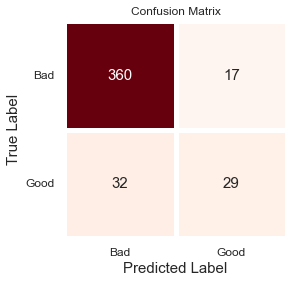

In [35]:
## You'll find the following input parameters helpful for heatmap
# annot=True, cmap='Reds', fmt = '.0f', linewidths = 5, cbar=False
# Make sure you pass the axis parameter `ax` to subplot as well
# i.e. make sure you pass `ax=ax` argument in heatmap function


cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = pl.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
pl.xlabel("Predicted Label")
pl.xticks(size = 12)
pl.yticks(size = 12, rotation = 0)
pl.ylabel("True Label")
pl.title("Confusion Matrix", size = 12)
pl.show()

## P2.3 CCDR Data Help

I'm developing different visualizations for CCDRs (Country Climate and Development Reports), and I need some help from you all to create some stuff that I can use 😃

<br>
The task is fairly simple, we want to gather data for a few indicators from CCDR API, collate them in a strctured format, and then create functions to visualize some data. 

#### Task 1

The first task for you is to create a function that accesses World Bank's API to get data for given indicators and countries. The function should expect two input values, `country` and `indicator`. Country and Inidcators can either be a single value or a list of entities. For instance, country variable can accept 'AFG' or ['AFG', 'IND', 'BRA'] and for inidcators either it accepts `SP.POP.TOTL` or ['SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS'].

If these ISO country codes are new to you, you can acces this [link](https://www.iban.com/country-codes) to get the list!

The output of the function should be dataframe with columns `country`, `iso3`, `year`, `SP.POP.TOTL`, `NY.GDP.PCAP.CD`, `CC.GHG.PECA`.

Some functions have been provided to you to get a list of all country iso3 codes and a function to map country codes with `regions`. 

In [36]:
def get_country_list():
    """
    Function to get a list of ISO3 country codes from World Bank Data API
    """
    
    req = requests.get("https://api.worldbank.org/v2/country/all?format=json&per_page=300").json()

    con_lis = [x['id'] for x in req[1] if x['region']['value'] != 'Aggregates']
    

    return con_lis

In [37]:
def get_region_dict():
    """
    Function to get a dictionary that maps ISO3 country codes with WB Regions
    """
    
    req = requests.get("https://api.worldbank.org/v2/country/all?format=json&per_page=300").json()

    dic = {x['id'] : x['region']['value'] for x in req[1] if x['region']['value'] != 'Aggregates'}

    return dic

In [38]:
## The endpoints we've used so far in previous exercises have been getting data for
# one country at a time. But the following endpoint will help getting data for multiple countries
# http://api.worldbank.org/v2/country/{}/indicator/{}?date=2020&format=json&per_page=200".format(country_list, indicator_list)
# Please note the country list and inidcator list are lists of string elements separated by semi-colon `;`
# You'll have to use string concatenation if more than one element is passed
# Also, consider using `isinstance` to evaluate if the input is a list of single element. 
# Since you want columns for each indicator, consider using `pivot` function from Pandas
# While making API request, you would need to pass a few parameters as well. 
# format=json, date=2018, source=87. You can decide per_page param, either choose 1 valye or paginate over pages

def get_ccdr_data(country, indicator):

    if isinstance(country, list):
        countries = ';'.join(country)
    else:
        countries = country

    if isinstance(indicator, list):
        indicators = ';'.join(indicator)
    else:
        indicators = indicator

    regions = get_region_dict()

    params = {"format" : "json", "date" : "2018", "per_page" : "1000", "source" : "87"}
    
    req = requests.get("http://api.worldbank.org/v2/country/{}/indicator/{}".format(countries, indicators), params = params)

    if req.status_code == 200:
        reqs = req.json()[1]

        df = pd.DataFrame()
        df['country'] = [x['country']['value'] for x in reqs]
        df['iso3'] = [x['country']['id'] for x in reqs]
        df['region'] = [regions[x] for x in df.iso3.values]
        df['indicator'] = [x['indicator']['id'] for x in reqs]
        df['year'] = [x['date'] for x in reqs]
        df['value'] = [x['value'] for x in reqs]

        df = df.pivot(['country', 'iso3', 'year', 'region'], 'indicator', 'value').reset_index()

        return df
    
    else:
        print("Request Error: {}".format(req.text))
        return None

In [39]:
country = get_country_list()
indicator = ['SP.POP.TOTL', 'NY.GDP.PCAP.CD', 'CC.GHG.PECA']

df = get_ccdr_data(country, indicator)

#### Task 2

Great job with the APIs and getting the data in required format. Now that we have some data, let's create some visulizations. 

The first plot I want is a scatter plot between `GDP per capita (current US$)` (NY.GDP.PCAP.CD) and `GHG Emissions per capita` (CC.GHG.PECA). Our task teams ate interested to see if there's any relation between the two indicators. 

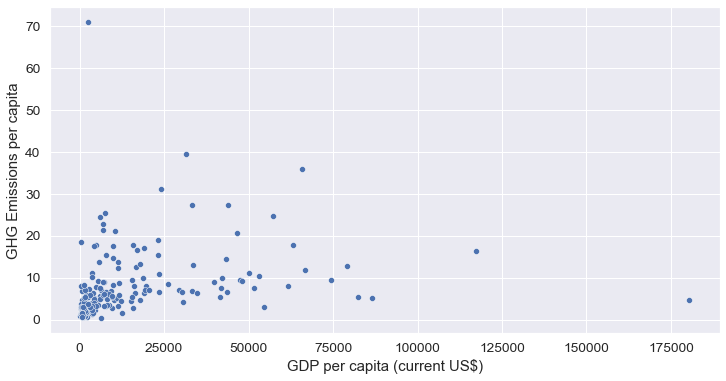

In [40]:
## Scatter plot between GDP per capita vs GHG Emissions per capita

### YOUR CODE HERE
pl.figure(figsize=(12,6))
sns.scatterplot(df['NY.GDP.PCAP.CD'], df['CC.GHG.PECA'])
pl.xlabel("GDP per capita (current US$)")
pl.ylabel("GHG Emissions per capita");

We can see some sort of linear relationship between the two variables. But lets add more attributes to the chart and make it more informative. We have provided you with a function that maps ISO3 country codes with WB Regions. Use that function to add another column to your dataset `Regions`. Once you get that, I want to color the dots on this plot by those Regions. 

Try doing `sns.scatterplot?` to see what parameters would help you achieve this task

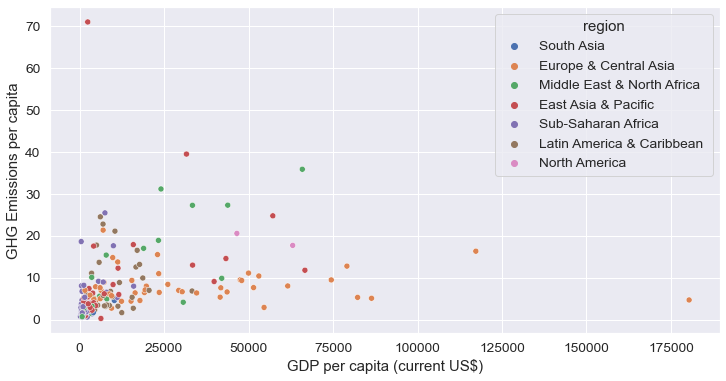

In [41]:
pl.figure(figsize=(12,6))
ax = sns.scatterplot(df['NY.GDP.PCAP.CD'], df['CC.GHG.PECA'], df.region)
pl.xlabel("GDP per capita (current US$)")
pl.ylabel("GHG Emissions per capita");

#### Task 3

If you were able to complete the tasks in the given time (you're a wizard if you did :) ), this additional task is for you. 

Create a function that uses the plot above, and displays a plot with a specific country in highlight i.e. if my input country in Bangladesh, it should show rest of the countries as above but Bangaldesh with a bigger `black dot`. We're creating a function because I want an easy way for this to be done for any country in question. 

In [42]:
def highlight_country(country):
    df_sub = df[df.country == country]

    fig, ax = pl.subplots(figsize=(12, 6))
    sns.scatterplot(df['NY.GDP.PCAP.CD'], df['CC.GHG.PECA'], df.region, ax=ax)
    ax.scatter(df_sub['NY.GDP.PCAP.CD'], df_sub['CC.GHG.PECA'], color='black', s= 100)
    pl.xlabel("GDP per capita (current US$)")
    pl.ylabel("GHG Emissions per capita");

    return

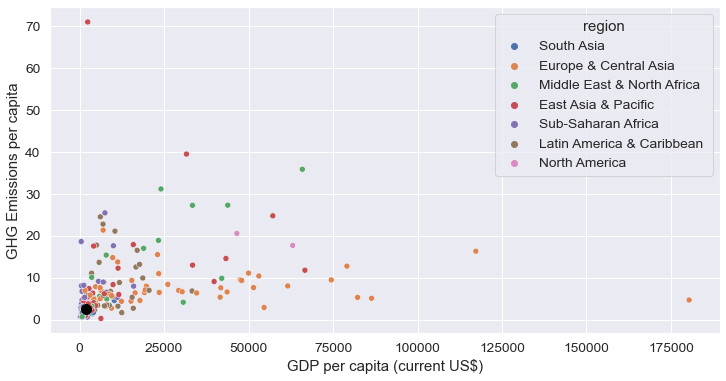

In [43]:
highlight_country('India')